<a href="https://colab.research.google.com/github/Hitika-Jain/ParkInsight/blob/main/Lstm_cnn(more).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Load dataset
data = pd.read_csv('pd_speech_features.csv', header=1)

# Separate features and target
X = data.drop(columns=['class', 'id', 'gender'])  # Assuming 'class' is the target
y = data['class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape if necessary
if len(X_scaled.shape) == 2:
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, 1, features)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()

# Check if CNN is valid
if X_train.shape[1] > 1:
    model.add(Conv1D(filters=64, kernel_size=min(3, X_train.shape[1]), activation='relu', padding="same", input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=min(2, X_train.shape[1])))
    model.add(Dropout(0.5))

# LSTM
model.add(LSTM(50, return_sequences=True))  # First LSTM
model.add(LSTM(50, return_sequences=False))  # Second LSTM
model.add(Dropout(0.5))

# Dense layers
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7203 - loss: 0.6728 - val_accuracy: 0.8158 - val_loss: 0.5879
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8598 - loss: 0.5388 - val_accuracy: 0.8421 - val_loss: 0.4634
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8938 - loss: 0.3714 - val_accuracy: 0.8553 - val_loss: 0.4113
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9123 - loss: 0.2572 - val_accuracy: 0.8882 - val_loss: 0.3651
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9409 - loss: 0.1615 - val_accuracy: 0.8816 - val_loss: 0.3504
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9961 - loss: 0.0630 - val_accuracy: 0.8882 - val_loss: 0.3422
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 0.8882 - val_loss: 0.3575
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.8882 - val_l

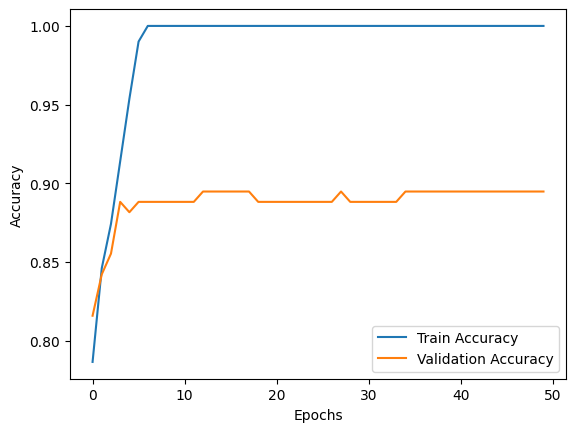

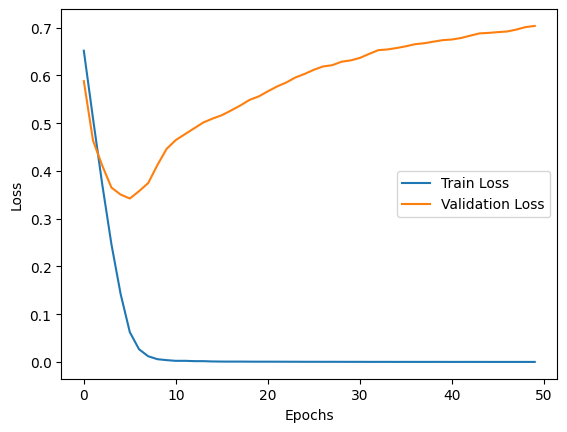

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training progress
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def add_noise(data, noise_factor=0.01):
    noise = np.random.normal(loc=0, scale=noise_factor, size=data.shape)
    return data + noise

X_train_augmented = add_noise(X_train)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 7.4121e-05 - val_accuracy: 0.8947 - val_loss: 0.7057
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 7.3065e-05 - val_accuracy: 0.8947 - val_loss: 0.7103
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.9170e-05 - val_accuracy: 0.8947 - val_loss: 0.7139
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.2365e-04 - val_accuracy: 0.8947 - val_loss: 0.7178
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.8851e-05 - val_accuracy: 0.8947 - val_loss: 0.7208
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 6.5874e-05 - val_accuracy: 0.8947 - val_loss: 0.7236
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.2607e-05 - val_accuracy: 0.8947 - val_loss: 0.7279
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 6.5012e-05 - 

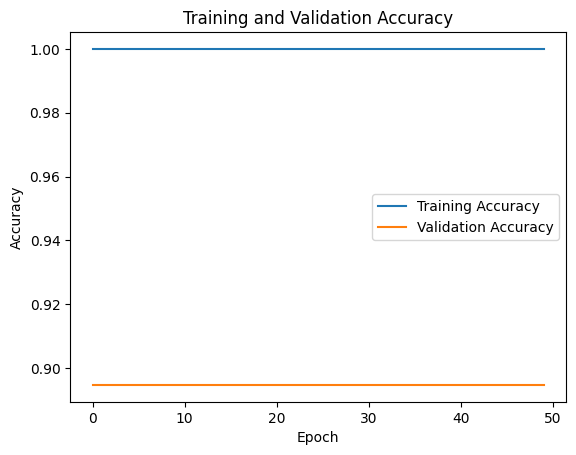

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')